In [16]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory


In [17]:
BATCH_SIZE = 100 # количество тренировочных изображений для обработки перед обновлением параметров модели
IMG_SHAPE = 150 # размерность к которой будет преведено входное изображение
EPOCHS = 120

train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test_dir'

total_train = 0
for animal in os.listdir(train_dir):
    total_train += len([name for name in os.listdir(train_dir + '/' + animal)])
print(total_train)

total_val = 0
for animal in os.listdir(validation_dir):
    total_val += len([name for name in os.listdir(validation_dir + '/' + animal)])
print(total_val)

21818
4361


In [18]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE))

Found 21818 images belonging to 10 classes.


In [19]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE))

Found 4361 images belonging to 10 classes.


In [20]:
model = tf.keras.models.load_model('models\81percent.keras')

In [21]:
test = image_gen_train.flow_from_directory(validation_dir,
    target_size = (IMG_SHAPE,IMG_SHAPE),
    batch_size = BATCH_SIZE,
    shuffle = False)

result = model.evaluate(test)
acc = dict(zip(model.metrics_names, result))['compile_metrics']*100
acc = round(acc)
print("Точность нейросети: ", acc, "%", sep='')

Found 4361 images belonging to 10 classes.
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 359ms/step - accuracy: 0.7869 - loss: 0.6709
Точность нейросети: 80%


44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 360ms/step


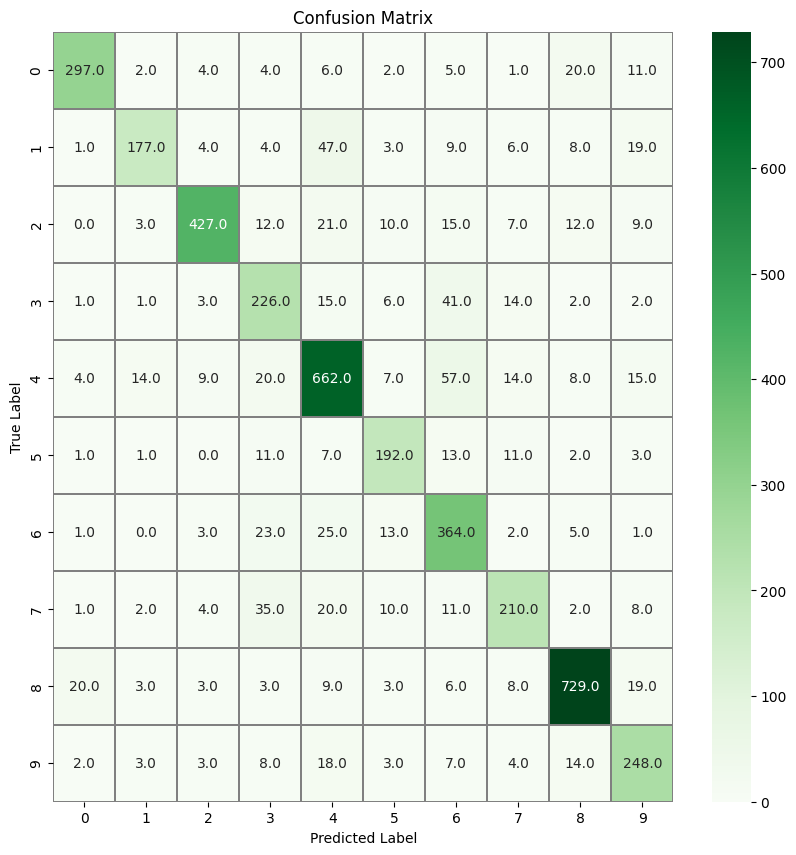

In [22]:
# Predict the values from the validation dataset
Y_pred = model.predict(test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.array(test.labels)

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       352
           1       0.86      0.64      0.73       278
           2       0.93      0.83      0.88       516
           3       0.65      0.73      0.69       311
           4       0.80      0.82      0.81       810
           5       0.77      0.80      0.78       241
           6       0.69      0.83      0.75       437
           7       0.76      0.69      0.72       303
           8       0.91      0.91      0.91       803
           9       0.74      0.80      0.77       310

    accuracy                           0.81      4361
   macro avg       0.80      0.79      0.79      4361
weighted avg       0.82      0.81      0.81      4361



In [24]:
myPicture = image_gen_train.flow_from_directory(test_dir,
    target_size = (IMG_SHAPE,IMG_SHAPE),
    batch_size = BATCH_SIZE,
    shuffle = False)

picture_names = myPicture.filenames
result = model.predict(myPicture, verbose=0)

train_ds = image_dataset_from_directory(train_dir)
class_names = dict(zip(train_ds.class_names, range(len(train_ds.class_names))))
class_names = list(class_names.keys())

for i in range(len(result)):
    print(f"Распознанная картинка {picture_names[i]}- это", class_names[np.argmax(result[i])])


Found 5 images belonging to 1 classes.


c:\Users\vedve\workspace\oirs_bmstu\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Found 21818 files belonging to 10 classes.
Распознанная картинка 1\-65h7juu3Jk.jpg- это cow
Распознанная картинка 1\104.jpg- это elephant
Распознанная картинка 1\69-pic_32ratio_1200x800-1200x800-7237.jpg- это dog
Распознанная картинка 1\acanthoscurria_geniculata-1080x720.jpg- это spider
Распознанная картинка 1\images.jpeg- это squirrel
